# **1. Hitung Entropy dan Gain**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {
    "OUTLOOK": [
        "Sunny", "Sunny", "Cloudy", "Rainy", "Rainy", "Rainy",
        "Cloudy", "Sunny", "Sunny", "Rainy", "Sunny", "Cloudy",
        "Cloudy", "Rainy"
    ],
    "TEMPERATURE": [
        "Hot", "Hot", "Hot", "Mild", "Cool", "Cool",
        "Cool", "Mild", "Cool", "Mild", "Mild", "Mild",
        "Hot", "Mild"
    ],
    "HUMIDITY": [
        "High", "High", "High", "High", "Normal", "Normal",
        "Normal", "High", "Normal", "Normal", "Normal", "High",
        "Normal", "High"
    ],
    "WINDY": [
        "No", "Yes", "No", "No", "No", "Yes",
        "Yes", "No", "No", "No", "Yes", "Yes",
        "No", "Yes"
    ],
    "PLAY": [
        "Don't Play", "Don't Play", "Play", "Play", "Play", "Play",
        "Play", "Don't Play", "Play", "Play", "Play", "Play",
        "Play", "Don't Play"
    ]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

In [7]:
# Function to calculate information gain
def info_gain(data, split_attr, target_attr="PLAY"):
    # Total entropy for the target attribute
    total_entropy = entropy(data[target_attr])

    # Values and counts for the splitting attribute
    values, counts = np.unique(data[split_attr], return_counts=True)

    # Weighted entropy for the split
    weighted_entropy = np.sum([
        (counts[i] / counts.sum()) * entropy(data[data[split_attr] == values[i]][target_attr])
        for i in range(len(values))
    ])

    # Information gain
    return total_entropy - weighted_entropy

In [8]:
entropy_total = entropy(df["PLAY"])

In [9]:
# Calculate information gain for each attribute
attributes = ["OUTLOOK", "TEMPERATURE", "HUMIDITY", "WINDY"]
gains = {attr: info_gain(df, attr) for attr in attributes}

In [10]:
print("Entropy Total (PLAY):", entropy_total)
print("Information Gain for each attribute:", gains)

Entropy Total (PLAY): 0.863120568566631
Information Gain for each attribute: {'OUTLOOK': 0.2585210366587628, 'TEMPERATURE': 0.18385092540042125, 'HUMIDITY': 0.37050650054950524, 'WINDY': 0.0059777114237739015}


# **2.  Decision Tree**

In [11]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
# Dataset berdasarkan tabel yang diberikan
data = {
    "OUTLOOK": [
        "Sunny", "Sunny", "Cloudy", "Rainy", "Rainy", "Rainy",
        "Cloudy", "Sunny", "Sunny", "Rainy", "Sunny", "Cloudy",
        "Cloudy", "Rainy"
    ],
    "TEMPERATURE": [
        "Hot", "Hot", "Hot", "Mild", "Cool", "Cool",
        "Cool", "Mild", "Cool", "Mild", "Mild", "Mild",
        "Hot", "Mild"
    ],
    "HUMIDITY": [
        "High", "High", "High", "High", "Normal", "Normal",
        "Normal", "High", "Normal", "Normal", "Normal", "High",
        "Normal", "High"
    ],
    "WINDY": [
        "No", "Yes", "No", "No", "No", "Yes",
        "Yes", "No", "No", "No", "Yes", "Yes",
        "No", "Yes"
    ],
    "PLAY": [
        "Don't Play", "Don't Play", "Play", "Play", "Play", "Play",
        "Play", "Don't Play", "Play", "Play", "Play", "Play",
        "Play", "Don't Play"
    ]
}


In [13]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [14]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["OUTLOOK", "TEMPERATURE", "HUMIDITY", "WINDY"], drop_first=True)


In [15]:
# Separate features and target
X = df_encoded.drop(columns=["PLAY"])
y = df["PLAY"]

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

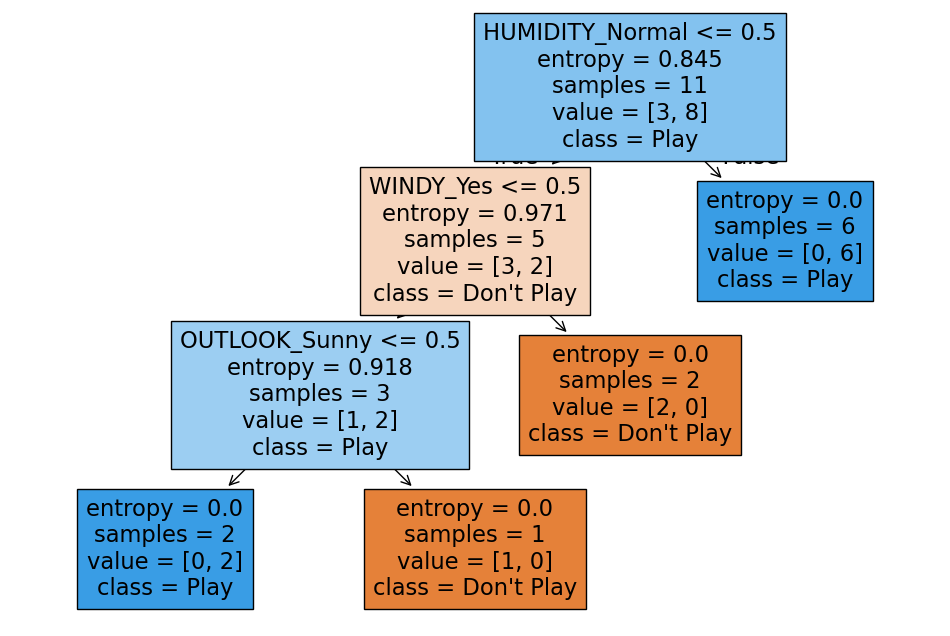

In [18]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [19]:
# Export tree as text
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- HUMIDITY_Normal <= 0.50
|   |--- WINDY_Yes <= 0.50
|   |   |--- OUTLOOK_Sunny <= 0.50
|   |   |   |--- class: Play
|   |   |--- OUTLOOK_Sunny >  0.50
|   |   |   |--- class: Don't Play
|   |--- WINDY_Yes >  0.50
|   |   |--- class: Don't Play
|--- HUMIDITY_Normal >  0.50
|   |--- class: Play

